## MNIST Logistic Regression
### Goals
* TensorFlow (TF) basics

### Contents
* How to use TF operators
* How to build a neural network model with TF

In [1]:
# import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  

In [2]:
# What is a tensor?
# https://www.tensorflow.org/api_docs/python/tf/Tensor
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
c?
c.shape

TensorShape([Dimension(2), Dimension(2)])

In [3]:
# What is tf operators?
# https://www.tensorflow.org/api_guides/python/math_ops
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])
e = tf.matmul(c, d)

In [4]:
# Evaluation
sess = tf.Session()
result = sess.run(e)    # result is ndarray
print(result)

[[ 1.  3.]
 [ 3.  7.]]


### DRAW HERE! Convolutional filter variable size

In [5]:
# Create a static graph for logistic regression
# Input and output as tf.placeholder,
# and weight variables as tf.Variable
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

# You can initialize the tf variable with other tf tensors
W = tf.Variable(tf.zeros([784, 10]))  
b = tf.Variable(tf.zeros([10]))

logits = tf.matmul(x, W) + b

In [6]:
# cost function
# https://www.tensorflow.org/api_guides/python/nn#Losses
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = y))

In [7]:
# Optimizer
# https://www.tensorflow.org/api_guides/python/train#Optimizers
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Create a static graph for logistic regression
# Input and output as tf.placeholder,
# and weight variables as tf.Variable
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

# You can initialize the tf variable with other tf tensors
W = tf.Variable(tf.zeros([784, 10]))  
b = tf.Variable(tf.zeros([10]))

logits = tf.matmul(x, W) + b

In [9]:
# cost function
# https://www.tensorflow.org/api_guides/python/nn#Losses
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = y))

In [10]:
# Optimizer
# https://www.tensorflow.org/api_guides/python/train#Optimizers
learn_rate = 0.01
optm = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)

In [11]:
# Accruracy evaluation
corr = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))    
accr = tf.reduce_mean(tf.cast(corr, "float"))

In [12]:
# Load dataset
mnist = input_data.read_data_sets('data/', one_hot=True)
trainImg   = mnist.train.images
trainLabel = mnist.train.labels
testImg    = mnist.test.images
testLabel  = mnist.test.labels

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [13]:
# Initialize the graph
init = tf.global_variables_initializer()

# Training cycle
training_epochs = 50
batch_size      = 100

# save 
save_cost = []
save_accr = []

In [16]:
# Training
with tf.Session() as sess:   
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0.
        avg_train_acc = 0.
        num_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(num_batch): 
            if 0: # Using tensorflow API
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            else: # Random batch sampling 
                randidx = np.random.randint(trainImg.shape[0], size=batch_size)
                batch_xs = trainImg[randidx, :]
                batch_ys = trainLabel[randidx, :]                

            # Fit training using batch data
            sess.run(optm, feed_dict={x: batch_xs, y: batch_ys})
            
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/num_batch
            avg_train_acc += sess.run(accr, feed_dict={x: batch_xs, y: batch_ys})/num_batch
        
        save_cost.append(avg_cost)
        save_accr.append(avg_train_acc)
        # Display logs per epoch step
        print ("Epoch: %03d/%03d cost: %.9f train_acc: %.3f" 
                   % (epoch, training_epochs, avg_cost, avg_train_acc))

print ("Optimization Finished!")

Epoch: 000/050 cost: 0.365334638 train_acc: 0.726
Epoch: 001/050 cost: 0.275513337 train_acc: 0.760
Epoch: 002/050 cost: 0.245153714 train_acc: 0.780
Epoch: 003/050 cost: 0.223635283 train_acc: 0.796
Epoch: 004/050 cost: 0.207221926 train_acc: 0.804
Epoch: 005/050 cost: 0.194422008 train_acc: 0.814
Epoch: 006/050 cost: 0.184142347 train_acc: 0.822
Epoch: 007/050 cost: 0.175629972 train_acc: 0.827
Epoch: 008/050 cost: 0.169683297 train_acc: 0.825
Epoch: 009/050 cost: 0.163862658 train_acc: 0.831
Epoch: 010/050 cost: 0.159016688 train_acc: 0.834
Epoch: 011/050 cost: 0.154744371 train_acc: 0.835
Epoch: 012/050 cost: 0.151101166 train_acc: 0.837
Epoch: 013/050 cost: 0.147892638 train_acc: 0.842
Epoch: 014/050 cost: 0.144450042 train_acc: 0.843
Epoch: 015/050 cost: 0.141542632 train_acc: 0.845
Epoch: 016/050 cost: 0.139417501 train_acc: 0.845
Epoch: 017/050 cost: 0.136743886 train_acc: 0.846
Epoch: 018/050 cost: 0.134629381 train_acc: 0.849
Epoch: 019/050 cost: 0.132584783 train_acc: 0.853


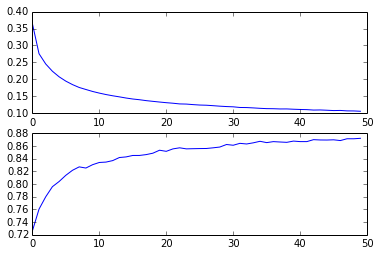

In [17]:
# Traininig curve
epochs = range(training_epochs)
plt.subplot(211)
plt.plot(epochs, save_cost)
plt.subplot(212)
plt.plot(epochs, save_accr)